In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

df = pd.read_csv("session_csv.csv") # reads the csv and creates the dataframe called movie
df.head()

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18


In [165]:
df_session_dummies = pd.get_dummies(df, columns=['action'])
# df_session_dummies.head(n=2)
# df_session_dummies_drop=df_session_dummies.drop(['created_at','value',],1)
# df_session_dummies.head()

In [166]:
df_search_cate = df_session_dummies[df_session_dummies.action_search_cate == 1 ]
df_search_cate=df_search_cate.drop(['action_click recommended menues','action_click recommended menu','action_click_genetic_rec','action_enter','action_enter_store','action_like','action_search_input','action_กรอกประวัติความหิว','action_สั่งอาหาร','action_เพิ่มเข้าตะกร้า','action_ใช้โค้ด'],1)
df_search_cate = df_search_cate.dropna()
df_search_cate_dummies = pd.get_dummies(df_search_cate, columns=['value'])
# df_search_cate_dummies.head()

In [167]:
new_df = pd.DataFrame(columns = ['user_id','value_all','value_delivery','value_ของหวาน','value_ชาบู','value_ปิ้งย่าง','value_สเต็ก',
        'value_อาหารญี่ปุ่น','value_อาหารเกาหลี','value_อาหารไทย','value_เครื่องดื่ม',])
for k,i in df_search_cate_dummies.iterrows():
    if any(new_df.user_id == i['user_id']) :

        index=new_df[new_df['user_id']== i['user_id']].index.item()
        
        
        if new_df.iloc[index]['value_all'] == 0  :
            new_df.set_value(index, 'value_all', i['value_all'])
        if new_df.iloc[index]['value_delivery'] == 0 :
            new_df.set_value(index, 'value_delivery',  i['value_delivery'])
        if new_df.iloc[index]['value_ของหวาน'] == 0 :
            new_df.set_value(index, 'value_ของหวาน',  i['value_ของหวาน'])
        if new_df.iloc[index]['value_ชาบู'] == 0  :
            new_df.set_value(index, 'value_ชาบู', i['value_ชาบู'])
        if new_df.iloc[index]['value_ปิ้งย่าง'] == 0  :
            new_df.set_value(index, 'value_ปิ้งย่าง', i['value_ปิ้งย่าง'])
        if new_df.iloc[index]['value_สเต็ก'] == 0  :
            new_df.set_value(index, 'value_สเต็ก', i['value_สเต็ก'])
        if new_df.iloc[index]['value_อาหารญี่ปุ่น'] == 0  :
            new_df.set_value(index, 'value_อาหารญี่ปุ่น', i['value_อาหารญี่ปุ่น'])
        if new_df.iloc[index]['value_อาหารเกาหลี'] == 0  :
            new_df.set_value(index, 'value_อาหารเกาหลี', i['value_อาหารเกาหลี'])
        if new_df.iloc[index]['value_อาหารไทย'] == 0  :
            new_df.set_value(index, 'value_อาหารไทย', i['value_อาหารไทย'])
        if new_df.iloc[index]['value_เครื่องดื่ม'] == 0  :
            new_df.set_value(index, 'value_เครื่องดื่ม', i['value_เครื่องดื่ม'])
   


    else :
        new_df.loc[len(new_df)] = [i['user_id'],i['value_all'],i['value_delivery'],i['value_ของหวาน'],
                                   i['value_ชาบู'],i['value_ปิ้งย่าง'],i['value_สเต็ก'],i['value_อาหารญี่ปุ่น'],
                                   i['value_อาหารเกาหลี'],i['value_อาหารไทย'],i['value_เครื่องดื่ม']]
                                       

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .ia

In [172]:
# new_df

In [173]:
# new_df.ix[:,1:11]

In [174]:
new_df
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(new_df.ix[:,1:11])

# pca_transformed = pca.fit_transform(X_scaled)
# plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

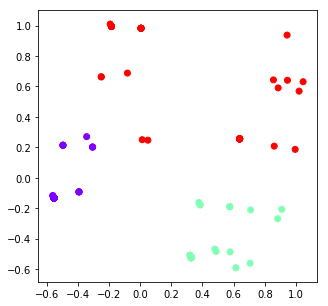

In [175]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_transformed)
new_df['cluster'] = X_clustered
# Define our own color map
# LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
# label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0], color='black')  
plt.figure(figsize = (5,5))
plt.scatter(pca_transformed[:,0],pca_transformed[:,1], c = kmeans.labels_, cmap='rainbow')  

# plt.scatter(pca_transformed[:,0],pca_transformed[:,1], c= label_color, alpha=0.5) 
plt.show()

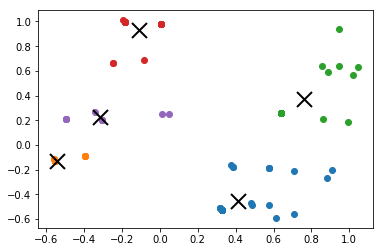

In [142]:
def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    new_df["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids


    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
#         plt.scatter(ds[:,0],ds[:,1], c=df7["clusters"], s=20)
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return labels


# pca = PCA(2)

# Turn the dummified df into two columns with PCA
# plot_columns = pca.fit_transform(df7.ix[:,1:19])

# Plot based on the two dimensions, and shade by cluster label
# plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
# plt.show()


label = kmeansshow(5,pca_transformed)

In [119]:
print("Homogeneity: %0.3f" %homogeneity_score(labels_true, kmeans.labels_))
      print("Completeness: %0.3f" % completeness_score(labels_true, kmeans.labels_))
      print("V-measure: %0.3f" % v_measure_score(labels_true, kmeans.labels_))
      print("Adjusted Rand Index: %0.3f"
            % adjusted_rand_score(labels_true, kmeans.labels_))
      print("Adjusted Mutual Information: %0.3f"
            % adjusted_mutual_info_score(labels_true, kmeans.labels_))
      print("Silhouette Coefficient: %0.3f"
            %silhouette_score(X, kmeans.labels_))

In [132]:
a = new_df.sort_values(by=['cluster'])
# a
# a.to_csv('new_df_kmeans.csv', encoding='utf-8', index=False)


In [133]:
new_df_k_mode = new_df
new_df_k_mode.head()

,user_id,value_all,value_delivery,value_ของหวาน,value_ชาบู,value_ปิ้งย่าง,value_สเต็ก,value_อาหารญี่ปุ่น,value_อาหารเกาหลี,value_อาหารไทย,value_เครื่องดื่ม,cluster,clusters
0,18,0,0,1,1,1,1,0,0,1,1,0,1
1,37,0,0,0,0,0,0,0,0,0,1,3,2
2,19,1,1,0,0,0,0,0,0,0,0,1,4
3,20,0,0,0,0,0,0,0,0,0,1,3,2
4,38,0,0,0,0,0,0,0,0,1,0,4,3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 391.0
Run 1, iteration: 2/100, moves: 0, cost: 391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16, cost: 391.0
Run 2, iteration: 2/100, moves: 0, cost: 391.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18, cost: 443.0
Run 4, iteration: 2/100, moves: 0, cost: 443.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11, cost: 430.0
Run 5, iteration: 2/100, moves: 0, cost: 430.0
Best run was number 1


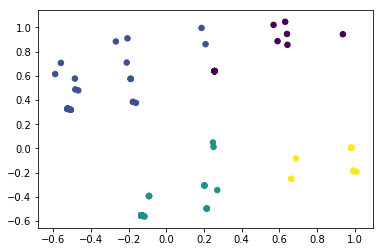

In [139]:
# import numpy as np
# from kmodes.kmodes import KModes
# from sklearn.decomposition import PCA

# pca = PCA(2)

# # Turn the dummified df into two columns with PCA
# # plot_columns = pca.fit_transform(df7.ix[:,:19])
# plot_columns = pca.fit_transform(new_df_k_mode.ix[:,1:11])

# x = new_df_k_mode.reset_index().values

# km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
# clusters = km.fit_predict(x)
# new_df_k_mode['cluster'] = clusters





# # Plot based on the two dimensions, and shade by cluster label
# plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=new_df_k_mode["cluster"], s=30)
# plt.show()

In [140]:
new_df.head()
# a = new_df.sort_values(by=['cluster'])
b = new_df_k_mode.sort_values(by=['cluster'])
# a.to_csv('new_df_kmeans.csv', encoding='utf-8', index=False)
b.to_csv('new_df_kmodes.csv', encoding='utf-8', index=False)

In [176]:
from sklearn.preprocessing import MinMaxScaler
# iris = datasets.load_iris()
# X = df7.ix[:,:]
X = new_df.ix[:,1:11]
y = new_df['cluster']
target_names = ['0','1','2','3','4','5']

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple','yellow']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


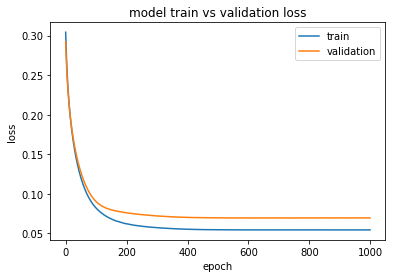

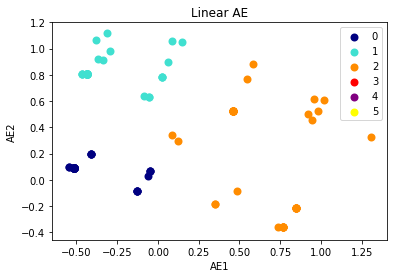

In [177]:

from keras.layers import Input, Dense
from keras.models import Model
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


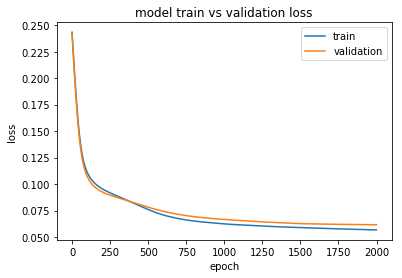

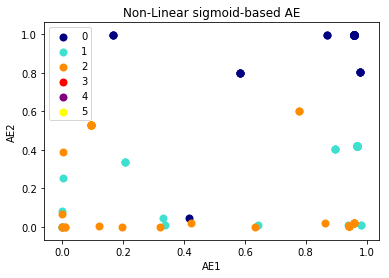

In [178]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 2  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=2000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


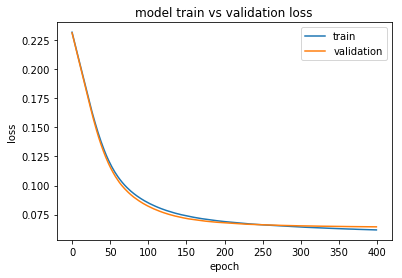

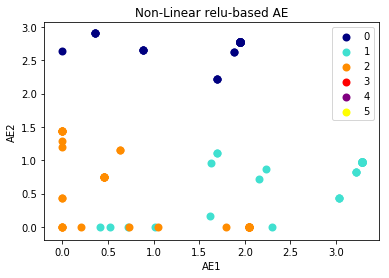

In [179]:
from keras import regularizers
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 2  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=400,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer3(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

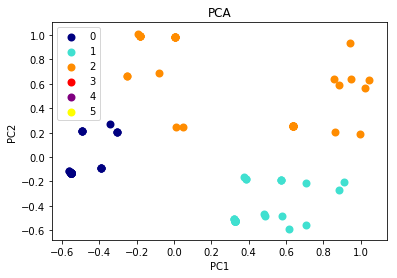

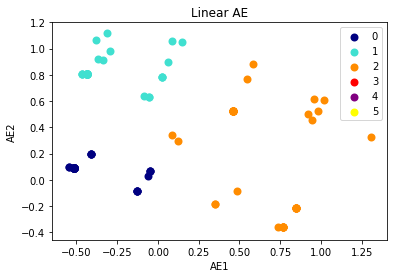

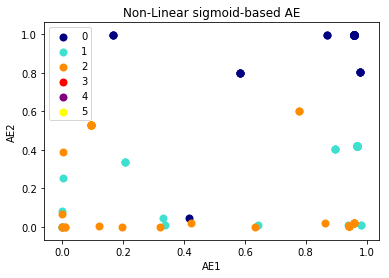

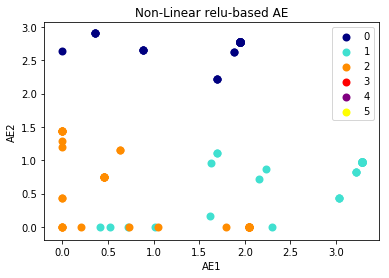

In [180]:
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  
plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  
plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  
plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE') 

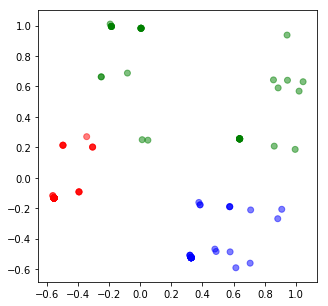

In [38]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_transformed)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(pca_transformed[:,0],pca_transformed[:,1], c= label_color, alpha=0.5) 
plt.show()

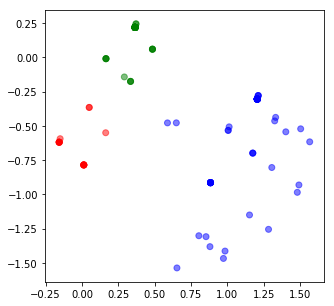

In [39]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(encoded_data)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(encoded_data[:,0],encoded_data[:,1], c= label_color, alpha=0.5) 
plt.show()

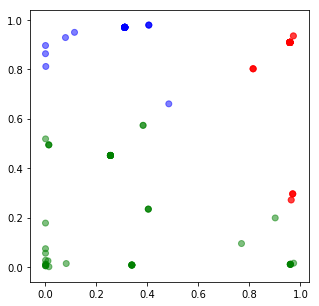

In [40]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(encoded_data2)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(encoded_data2[:,0],encoded_data2[:,1], c= label_color, alpha=0.5) 
plt.show()

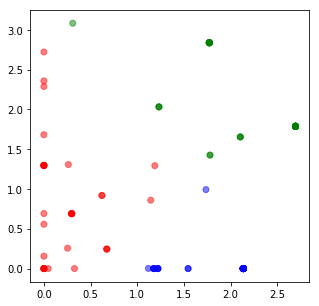

In [41]:
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(encoded_data3)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(encoded_data3[:,0],encoded_data3[:,1], c= label_color, alpha=0.5) 
plt.show()

In [183]:
from sklearn.metrics import accuracy_score,homogeneity_score,completeness_score,v_measure_score,silhouette_score,adjusted_rand_score,adjusted_mutual_info_score #works

labels_true = y 
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for n_clusters_ in [5]:
  estimators = [

                ('PCA'    , KMeans(n_clusters=n_clusters_), pca_transformed),
                ('AE linear' , KMeans(n_clusters=n_clusters_), encoded_data),
                ('AE sigmoid' , KMeans(n_clusters=n_clusters_), encoded_data2),
                ('AE relu', KMeans(n_clusters=n_clusters_), encoded_data3)]

  print(type(y))
  print('Number of clusters: %d' % n_clusters_)
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
#       print(labels[:])
      print(name,':')
#       print(labels[:]) 
      print("Homogeneity: %0.3f" %homogeneity_score(labels_true, labels))
      print("Completeness: %0.3f" % completeness_score(labels_true, labels))
      print("V-measure: %0.3f" % v_measure_score(labels_true, labels))
      print("Adjusted Rand Index: %0.3f"
            % adjusted_rand_score(labels_true, labels))
      print("Adjusted Mutual Information: %0.3f"
            % adjusted_mutual_info_score(labels_true, labels))
      print("Silhouette Coefficient: %0.3f"
            %silhouette_score(X, labels))
      print()
  print()
  print('----------------------------------------------------------------------------------')
  print()

<class 'pandas.core.series.Series'>
Number of clusters: 5
PCA :
Homogeneity: 0.967
Completeness: 0.720
V-measure: 0.826
Adjusted Rand Index: 0.796
Adjusted Mutual Information: 0.714
Silhouette Coefficient: 0.785

AE linear :
Homogeneity: 0.967
Completeness: 0.720
V-measure: 0.826
Adjusted Rand Index: 0.796
Adjusted Mutual Information: 0.714
Silhouette Coefficient: 0.770

AE sigmoid :
Homogeneity: 0.692
Completeness: 0.504
V-measure: 0.583
Adjusted Rand Index: 0.649
Adjusted Mutual Information: 0.493
Silhouette Coefficient: 0.785

AE relu :
Homogeneity: 0.842
Completeness: 0.611
V-measure: 0.708
Adjusted Rand Index: 0.667
Adjusted Mutual Information: 0.603
Silhouette Coefficient: 0.775


----------------------------------------------------------------------------------



In [163]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

# pca = PCA(2)

# # Turn the dummified df into two columns with PCA
# X = pca.fit_transform(new_df.ix[:,1:20])



db = DBSCAN(eps=0.3, min_samples=10).fit(encoded_data)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

4
Estimated number of clusters: 4
Silhouette Coefficient: 0.486


TypeError: unhashable type: 'slice'

# K modes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 374.0
Run 2, iteration: 2/100, moves: 0, cost: 374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 59, cost: 371.0
Run 4, iteration: 2/100, moves: 1, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 406.0
Best run was number 4


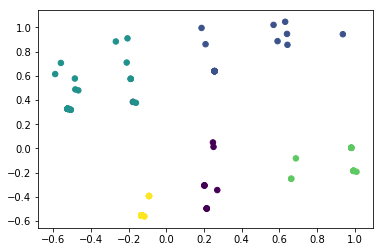

In [157]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

pca = PCA(2)

# Turn the dummified df into two columns with PCA
# plot_columns = pca.fit_transform(df7.ix[:,:19])
plot_columns = pca.fit_transform(new_df_k_mode.ix[:,1:11])

x = new_df_k_mode.reset_index().values

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
new_df_k_mode['cluster'] = clusters





# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=new_df_k_mode["cluster"], s=30)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


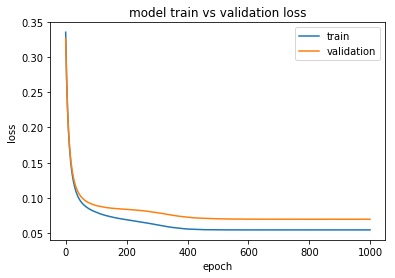

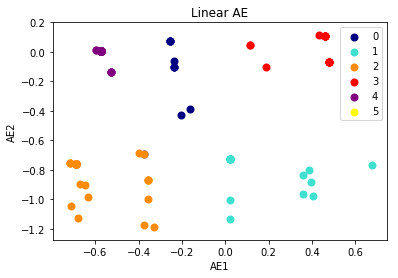

In [158]:
from sklearn.preprocessing import MinMaxScaler
# iris = datasets.load_iris()
# X = df7.ix[:,:]
X = new_df_k_mode.ix[:,1:11]
y = new_df_k_mode['cluster']
target_names = ['0','1','2','3','4','5']

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple','yellow']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()
from keras.layers import Input, Dense
from keras.models import Model
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


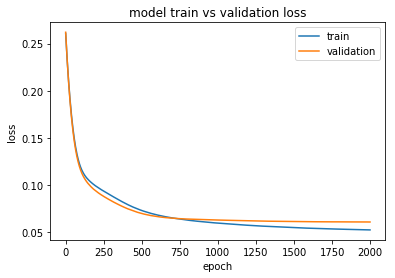

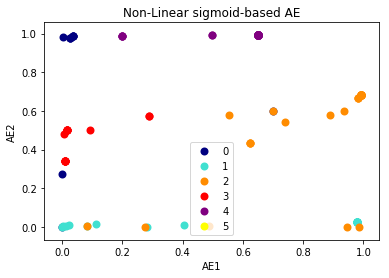

In [159]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 2  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=2000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                30        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


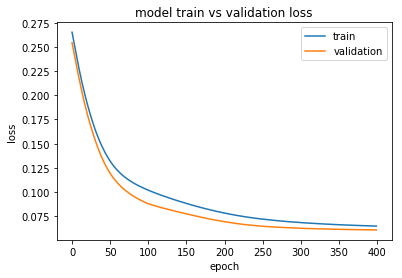

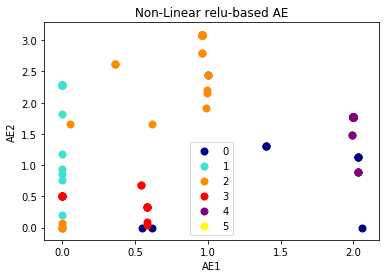

In [160]:
from keras import regularizers
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 2  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=400,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer3(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

In [161]:
# new_df_k_mode.ix[:,1:11]

,value_all,value_delivery,value_ของหวาน,value_ชาบู,value_ปิ้งย่าง,value_สเต็ก,value_อาหารญี่ปุ่น,value_อาหารเกาหลี,value_อาหารไทย,value_เครื่องดื่ม
0,0,0,1,1,1,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0
5,0,1,0,1,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,1,0,0,0,1,1


In [162]:
 new_df_k_mode['cluster']

0      2
1      1
2      3
3      1
4      4
5      1
6      1
7      1
8      0
9      2
10     3
11     0
12     1
13     1
14     0
15     4
16     1
17     4
18     0
19     4
20     2
21     3
22     2
23     3
24     4
25     3
26     1
27     1
28     3
29     4
      ..
110    4
111    1
112    2
113    1
114    1
115    2
116    2
117    4
118    3
119    4
120    4
121    4
122    4
123    4
124    2
125    2
126    2
127    3
128    4
129    2
130    2
131    4
132    4
133    4
134    2
135    2
136    1
137    0
138    0
139    1
Name: cluster, Length: 140, dtype: uint8